In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Caricamento dataset
meteorite_data = pd.read_csv('Meteorite_Landings.csv')
bolide_data = pd.read_csv('Fireball_And_Bolide_Reports.csv')

In [3]:
# Analisi preliminare dei dataset
print("Meteorite Landings Data Summary:")
print(meteorite_data.info())
print(meteorite_data.head())

print("\nFireball And Bolide Reports Data Summary:")
print(bolide_data.info())
print(bolide_data.head())

Meteorite Landings Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass (g)     45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45425 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB
None
       name   id nametype     recclass  mass (g)  fall    year    reclat  \
0    Aachen    1    Valid           L5      21.0  Fell  1880.0  50.77500   
1    Aarhus    2    Valid           H6     720.0  Fell  1951.0  56.18333   
2      Abee    6    Valid          EH4  107000.0  Fell  195

In [4]:
# Nomi delle colonne
print("\nColumns in Meteorite Landings dataset:")
print(meteorite_data.columns)

print("\nColumns in Fireball And Bolide Reports dataset:")
print(bolide_data.columns)


Columns in Meteorite Landings dataset:
Index(['name', 'id', 'nametype', 'recclass', 'mass (g)', 'fall', 'year',
       'reclat', 'reclong', 'GeoLocation'],
      dtype='object')

Columns in Fireball And Bolide Reports dataset:
Index(['Date/Time - Peak Brightness (UT)', 'Latitude (Deg)', 'Longitude (Deg)',
       'Altitude (km)', 'Velocity (km/s)', 'Velocity Components (km/s): vx',
       'Velocity Components (km/s): vy', 'Velocity Components (km/s): vz',
       'Total Radiated Energy (J)', 'Calculated Total Impact Energy (kt)'],
      dtype='object')


In [5]:
#ANALISI STATISTICA

In [6]:
# Statistiche descrittive per i meteoriti
print("\nStatistiche descrittive dei meteoriti:")
print(meteorite_data.describe())


Statistiche descrittive dei meteoriti:
                 id      mass (g)          year        reclat       reclong
count  45716.000000  4.558500e+04  45425.000000  38401.000000  38401.000000
mean   26889.735104  1.327808e+04   1991.828817    -39.122580     61.074319
std    16860.683030  5.749889e+05     25.052766     46.378511     80.647298
min        1.000000  0.000000e+00    860.000000    -87.366670   -165.433330
25%    12688.750000  7.200000e+00   1987.000000    -76.714240      0.000000
50%    24261.500000  3.260000e+01   1998.000000    -71.500000     35.666670
75%    40656.750000  2.026000e+02   2003.000000      0.000000    157.166670
max    57458.000000  6.000000e+07   2101.000000     81.166670    354.473330


In [7]:
# Pulizia dei dati
# Conversione delle colonne di data nei dataset
meteorite_data['year'] = pd.to_datetime(meteorite_data['year'], errors='coerce').dt.year

# Formato della data per la conversione
date_format = '%Y-%m-%d %H:%M:%S'
if 'Date/Time - Peak Brightness (UT)' in bolide_data.columns:
    bolide_data['Date/Time'] = pd.to_datetime(bolide_data['Date/Time - Peak Brightness (UT)'], format=date_format, errors='coerce')
    bolide_data['year'] = bolide_data['Date/Time'].dt.year
else:
    print("La colonna 'Date/Time - Peak Brightness (UT)' non è presente nel dataset dei bolidi.")

In [8]:
# Statistiche descrittive per i bolidi
print("\nStatistiche descrittive dei bolidi:")
print(bolide_data.describe())


Statistiche descrittive dei bolidi:
       Altitude (km)  Velocity (km/s)  Velocity Components (km/s): vx  \
count      68.000000         7.000000                       52.000000   
mean       32.314706        19.228571                        1.469231   
min        18.700000        12.400000                      -35.400000   
25%        26.300000        17.100000                       -5.050000   
50%        30.700000        18.100000                        1.850000   
75%        37.000000        18.900000                       10.375000   
max        66.600000        32.100000                       21.300000   
std         8.613219         6.119018                       11.427033   

       Velocity Components (km/s): vy  Velocity Components (km/s): vz  \
count                       52.000000                       52.000000   
mean                        -2.836538                       -1.138462   
min                        -43.500000                      -27.000000   
25%          

In [9]:
# Selezione delle colonne numeriche per il calcolo delle correlazioni
meteorite_data_numeric = meteorite_data.select_dtypes(include=[np.number])
bolide_data_numeric = bolide_data.select_dtypes(include=[np.number])

# Analisi delle correlazioni
print("\nCorrelazioni nel dataset dei meteoriti:")
print(meteorite_data_numeric.corr())

print("\nCorrelazioni nel dataset dei bolidi:")
print(bolide_data_numeric.corr())


Correlazioni nel dataset dei meteoriti:
                id  mass (g)  year    reclat   reclong
id        1.000000 -0.018911   NaN  0.271095 -0.333863
mass (g) -0.018911  1.000000   NaN  0.029087 -0.021860
year           NaN       NaN   NaN       NaN       NaN
reclat    0.271095  0.029087   NaN  1.000000 -0.591539
reclong  -0.333863 -0.021860   NaN -0.591539  1.000000

Correlazioni nel dataset dei bolidi:
                                     Altitude (km)  Velocity (km/s)  \
Altitude (km)                             1.000000         0.696699   
Velocity (km/s)                           0.696699         1.000000   
Velocity Components (km/s): vx           -0.350051        -0.252502   
Velocity Components (km/s): vy            0.000323        -0.605191   
Velocity Components (km/s): vz           -0.018960        -0.634172   
Total Radiated Energy (J)                -0.145425        -0.028215   
Calculated Total Impact Energy (kt)      -0.152653        -0.018799   
year                   

In [10]:
print("Media della massa dei meteoriti:", meteorite_data['mass (g)'].mean())
print("Mediana della massa dei meteoriti:", meteorite_data['mass (g)'].median())
print("Moda della classe di tipo dei meteoriti:", meteorite_data['recclass'].mode())

Media della massa dei meteoriti: 13278.078548601512
Mediana della massa dei meteoriti: 32.6
Moda della classe di tipo dei meteoriti: 0    L6
Name: recclass, dtype: object


In [11]:
# Conversione della colonna rilevante in numerica
bolide_data['Total Radiated Energy (J)'] = pd.to_numeric(bolide_data['Total Radiated Energy (J)'], errors='coerce')

# Rimozione delle righe con valori nulli
bolide_data_clean = bolide_data.dropna(subset=['Total Radiated Energy (J)'])

# Calcolo della media, mediana e moda per Total Radiated Energy (J)
mean_radiated_energy = bolide_data_clean['Total Radiated Energy (J)'].mean()
median_radiated_energy = bolide_data_clean['Total Radiated Energy (J)'].median()

# Calcolo della moda utilizzando pandas
mode_radiated_energy = bolide_data_clean['Total Radiated Energy (J)'].mode()

# Se la moda è multipla, prendi il primo valore
if not mode_radiated_energy.empty:
    mode_radiated_energy = mode_radiated_energy.iloc[0]
else:
    mode_radiated_energy = None

# Stampa dei risultati
print("Media di Total Radiated Energy (J):", mean_radiated_energy)
print("Mediana di Total Radiated Energy (J):", median_radiated_energy)
print("Moda di Total Radiated Energy (J):", mode_radiated_energy)


Media di Total Radiated Energy (J): 4897684782608.695
Mediana di Total Radiated Energy (J): 74000000000.0
Moda di Total Radiated Energy (J): 20000000000


In [12]:
#VISUALIZZAZIONI

C:\Users\user\AppData\Local\Temp\ipykernel_9272\4268942234.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meteorite_data_clean['mass (g)'] = pd.to_numeric(meteorite_data_clean['mass (g)'], errors='coerce')


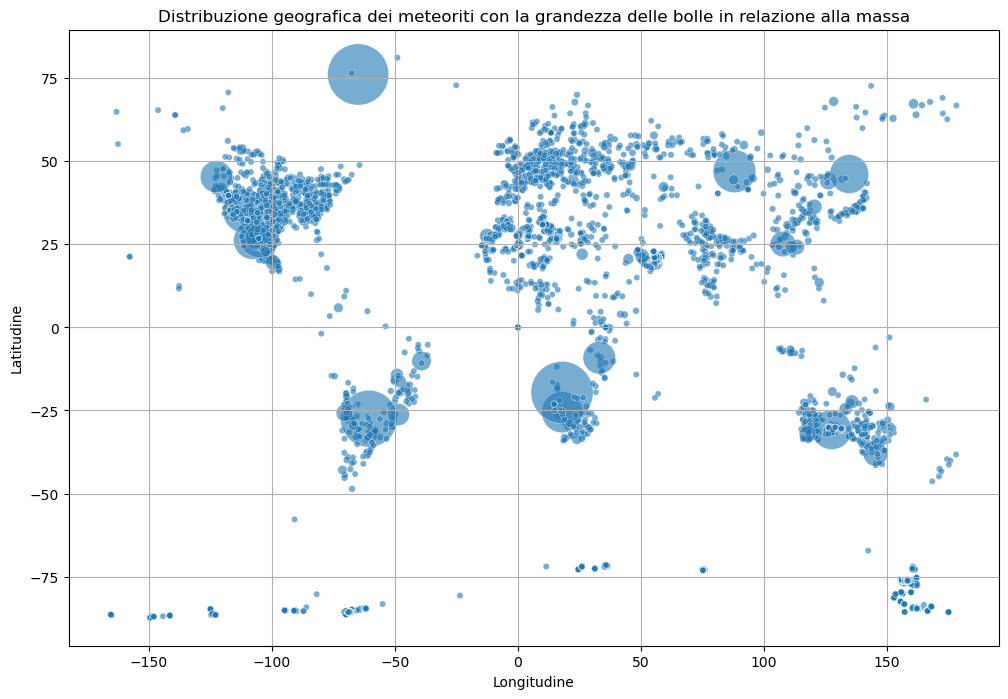

In [14]:
# Pulizia dei dati
# Rimozione delle righe con valori nulli nelle colonne 'reclat', 'reclong' e 'mass (g)'
meteorite_data_clean = meteorite_data.dropna(subset=['reclat', 'reclong', 'mass (g)'])

# Conversione della colonna 'mass (g)' in numerico
meteorite_data_clean['mass (g)'] = pd.to_numeric(meteorite_data_clean['mass (g)'], errors='coerce')

# Rimozione delle righe con valori nulli nella colonna 'mass (g)'
meteorite_data_clean = meteorite_data_clean.dropna(subset=['mass (g)'])

# Scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='reclong', 
    y='reclat', 
    size='mass (g)', 
    sizes=(20, 2000), 
    data=meteorite_data_clean, 
    legend=False, 
    alpha=0.6
)
plt.title('Distribuzione geografica dei meteoriti con la grandezza delle bolle in relazione alla massa')
plt.xlabel('Longitudine')
plt.ylabel('Latitudine')
plt.grid(True)
plt.show()

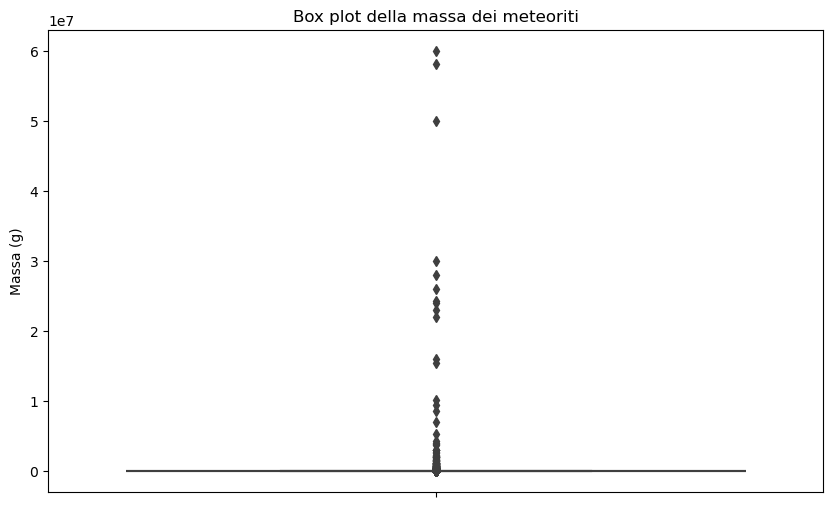

In [15]:
# 3. Box plot della massa dei meteoriti
plt.figure(figsize=(10, 6))
sns.boxplot(y='mass (g)', data=meteorite_data_clean)
plt.title('Box plot della massa dei meteoriti')
plt.ylabel('Massa (g)')
plt.show()

In [16]:
!pip install geopandas contextily
!pip install cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


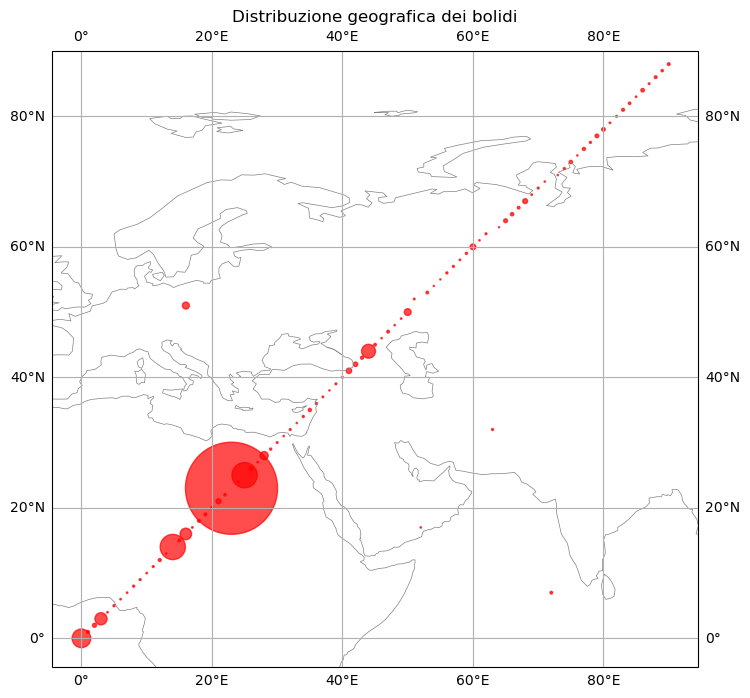

In [17]:
# Plotting con Cartopy e Matplotlib
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Confini delle terre
ax.add_feature(cfeature.COASTLINE, edgecolor='gray', linewidth=0.5)

# Plot dei bolidi
ax.scatter(bolide_data_clean['Longitude (Deg)'], bolide_data_clean['Latitude (Deg)'],
           s=bolide_data_clean['Calculated Total Impact Energy (kt)'] * 10, color='red', alpha=0.7,
           transform=ccrs.PlateCarree())

# Graticule
ax.gridlines(draw_labels=True)

# Personalizza etichette e titolo
ax.set_xlabel('Longitudine')
ax.set_ylabel('Latitudine')
ax.set_title('Distribuzione geografica dei bolidi')

# Mostra il plot
plt.show()

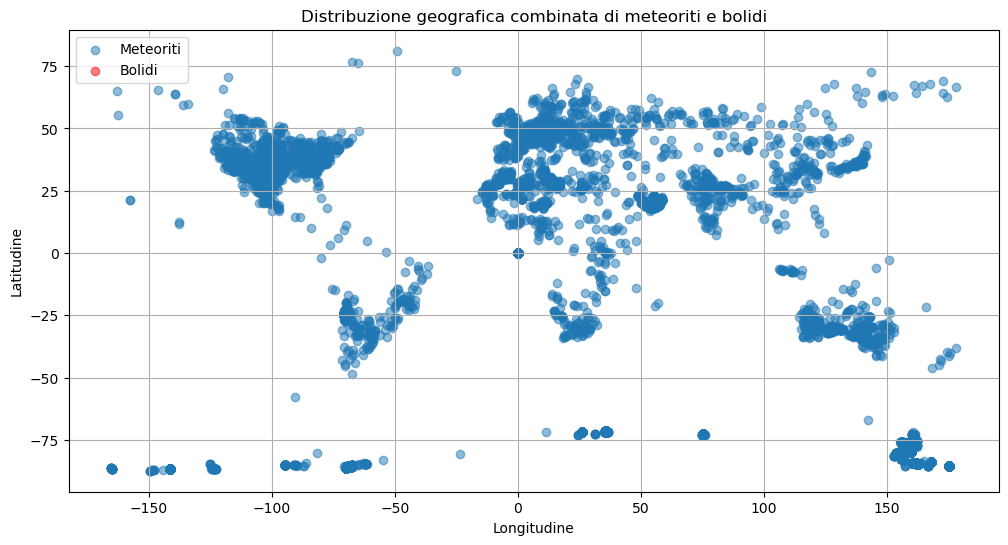

In [18]:
# Pulizia dei dati
# Assicurarsi che le colonne rilevanti siano numeriche e non contengano valori nulli
meteorite_data['reclong'] = pd.to_numeric(meteorite_data['reclong'], errors='coerce')
meteorite_data['reclat'] = pd.to_numeric(meteorite_data['reclat'], errors='coerce')

bolide_data['Longitude (Deg)'] = pd.to_numeric(bolide_data['Longitude (Deg)'], errors='coerce')
bolide_data['Latitude (Deg)'] = pd.to_numeric(bolide_data['Latitude (Deg)'], errors='coerce')

# Filtrare i dati per assicurarsi che latitudine e longitudine siano nei range corretti
meteorite_data_clean = meteorite_data.dropna(subset=['reclong', 'reclat'])
meteorite_data_clean = meteorite_data_clean[(meteorite_data_clean['reclat'] >= -90) & (meteorite_data_clean['reclat'] <= 90)]
meteorite_data_clean = meteorite_data_clean[(meteorite_data_clean['reclong'] >= -180) & (meteorite_data_clean['reclong'] <= 180)]

bolide_data_clean = bolide_data.dropna(subset=['Longitude (Deg)', 'Latitude (Deg)'])
bolide_data_clean = bolide_data_clean[(bolide_data_clean['Latitude (Deg)'] >= -90) & (bolide_data_clean['Latitude (Deg)'] <= 90)]
bolide_data_clean = bolide_data_clean[(bolide_data_clean['Longitude (Deg)'] >= -180) & (bolide_data_clean['Longitude (Deg)'] <= 180)]

# Distribuzione geospaziale combinata
plt.figure(figsize=(12, 6))
plt.scatter(meteorite_data_clean['reclong'], meteorite_data_clean['reclat'], alpha=0.5, label='Meteoriti')
plt.scatter(bolide_data_clean['Longitude (Deg)'], bolide_data_clean['Latitude (Deg)'], alpha=0.5, label='Bolidi', color='r')
plt.title('Distribuzione geografica combinata di meteoriti e bolidi')
plt.xlabel('Longitudine')
plt.ylabel('Latitudine')
plt.legend()
plt.grid(True)
plt.show()
